<a href="https://colab.research.google.com/github/SergeyMitrofanov88/Optimization_scripts/blob/main/Optimization_KRM_PP(LW_%E2%84%965)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandapower

##Построение энергетической системы с использование установок КРМ

In [ ]:
import pandapower as pp
import pandas as pd
#Создадим функцию позволяющую автоматически вносить значения в переменную диапазона реактивной мощность и состояния работы КРМ
def energyCRM(Qper, in_service):
#Создаем пустую сеть без элементов
  net = pp.create_empty_network()
#Создаем шины с указанием параметра номинального напряжения для подключения генераторов, энергосистемы и нагрузок
  busC1 = pp.create_bus(net, vn_kv = 10.5, type='b')
  busC2 = pp.create_bus(net, vn_kv = 10.5, type='b')
  busC3 = pp.create_bus(net, vn_kv = 10.5, type='b')
  busH6 = pp.create_bus(net, vn_kv = 10.5, type='b')
  busH8 = pp.create_bus(net, vn_kv = 10.5, type='b')
  busH2 = pp.create_bus(net, vn_kv = 110, type='b')
  busH3 = pp.create_bus(net, vn_kv = 110, type='b')
  busH1 = pp.create_bus(net, vn_kv = 110, type='b')
  busGS = pp.create_bus(net, vn_kv = 110, type='b')
  busT1 = pp.create_bus(net, vn_kv = 110, type='b')
  busT2 = pp.create_bus(net, vn_kv = 110, type='b')
  busT3 = pp.create_bus(net, vn_kv = 110, type='b')
#Создаем нагрузки с указанием реактивной и активной составляющей мощности
  pp.create_load(net, bus=busC1, p_mw=5, q_mvar=3)
  pp.create_load(net, bus=busC2, p_mw=3, q_mvar=5)
  pp.create_load(net, bus=busH6, p_mw=5, q_mvar=4)
  pp.create_load(net, bus=busC3, p_mw=2, q_mvar=1.6)
  pp.create_load(net, bus=busH8, p_mw=4, q_mvar=3.5)
  pp.create_load(net, bus=busH3, p_mw=27, q_mvar=22)
  pp.create_load(net, bus=busH2, p_mw=27, q_mvar=21)
  pp.create_load(net, bus=busH1, p_mw=15, q_mvar=10.9)
#Создадим трансформаторы с параметрами из найденных каталогов
#Т1 ТДН32000 110/10
  transformer1 = pp.create_transformer_from_parameters(net, hv_bus=busT1, lv_bus=busH8,
  sn_mva=32, vn_hv_kv=110, vn_lv_kv=10, vk_percent=10.5, vkr_percent=0.5, pfe_kw=160, i0_percent=0.25)
#Т2 ТД40000 110/10
  transformer2 = pp.create_transformer_from_parameters(net, hv_bus=busT2, lv_bus=busC2,
  sn_mva=40, vn_hv_kv=110, vn_lv_kv=10, vk_percent=10.5, vkr_percent=0.53, pfe_kw=170, i0_percent=0.15)
#Т3 ТД40000 110/10
  transformer3 = pp.create_transformer_from_parameters(net, hv_bus=busT3, lv_bus=busC1,
  sn_mva=40, vn_hv_kv=110, vn_lv_kv=10, vk_percent=10.5, vkr_percent=0.053, pfe_kw=170, i0_percent=0.15)
#Создадим ЛЭП с параметрами из каталога
#ЛЭП 110 кВ
  L7H1GS = pp.create_line_from_parameters(net, from_bus=busH1, to_bus=busGS, length_km=1.2, name='L7', r_ohm_per_km=0.306, x_ohm_per_km=0.434, c_nf_per_km=0.035, max_i_ka=0.330, parallel=1)
  L4H1H2 = pp.create_line_from_parameters(net, from_bus=busH1, to_bus=busH2, length_km=1.4, name='L4', r_ohm_per_km=0.306, x_ohm_per_km=0.434, c_nf_per_km=0.035, max_i_ka=0.330, parallel=1)
  L1GST1 = pp.create_line_from_parameters(net, from_bus=busGS, to_bus=busT1, length_km=6.1, name='L1', r_ohm_per_km=0.428, x_ohm_per_km=0.444, c_nf_per_km=0.034, max_i_ka=0.265, parallel=1)
  L2H3T2 = pp.create_line_from_parameters(net, from_bus=busH3, to_bus=busT2, length_km=9.6, name='L2', r_ohm_per_km=0.428, x_ohm_per_km=0.444, c_nf_per_km=0.034, max_i_ka=0.265, parallel=1)
  L3GST3 = pp.create_line_from_parameters(net, from_bus=busH3, to_bus=busT3, length_km=8.8, name='L3', r_ohm_per_km=0.428, x_ohm_per_km=0.444, c_nf_per_km=0.034, max_i_ka=0.265, parallel=1)
#ЛЭП 10 кВ
  L5H8H7 = pp.create_line_from_parameters(net, from_bus=busH8, to_bus=busC3, length_km=1.1, name='L5', r_ohm_per_km=0.12, x_ohm_per_km=0.369, c_nf_per_km=0, max_i_ka=0.605, parallel=1)
  L6H6H5 = pp.create_line_from_parameters(net, from_bus=busH6, to_bus=busC2, length_km=1.3, name='L6', r_ohm_per_km=0.162, x_ohm_per_km=0.377, c_nf_per_km=0, max_i_ka=0.510, parallel=1)
#Создадим энергосистему
  GS = pp.create_ext_grid(net, bus=busGS, vm_pu=1.0, name=None)
#Создадим имитацию межсекционных выключателей
  S1H2H3 = pp.create.create_switch(net, bus = busH2, element = busH3, et='b', closed=True)
  S2H4H5 = pp.create.create_switch(net, bus = busC1, element = busC2, et='b', closed=True)
  S3H7H6 = pp.create.create_switch(net, bus = busC3, element = busH6, et='b', closed=True)
#Установки компенсации реактивной мощности
  С1 = pp.create.create_shunt_as_capacitor(net, busC1, q_mvar=-(3*0.9*Qper), loss_factor=0, in_service = in_service[0])
  С2 = pp.create.create_shunt_as_capacitor(net, busC2, q_mvar=-(5*0.9*Qper), loss_factor=0, in_service = in_service[1])
  С3 = pp.create.create_shunt_as_capacitor(net, busC3, q_mvar=-(4*0.9*Qper), loss_factor=0, in_service = in_service[2])
  pp.runpp(net)
  return net

##Поиск всех возможных комбинаций расположения установок КРМ в узлах сети

In [ ]:
#При помощи библиотеки itertools можно автоматизировать процесс подбора комбинаций
from itertools import *
import matplotlib.pyplot as plt
pl_list = []
ql_list = []
variants = []
for Qper in [1, 0.75, 0.5, 0.25]:
  for in_service in product((True, False), repeat = 3):
    print(Qper, in_service)
    net = energyCRM(Qper, in_service)
    pp.runpp(net)
    print(net.res_line.pl_mw.sum())
    print(net.res_line.ql_mvar.sum())
    pl_list.append(net.res_line.pl_mw.sum())
    ql_list.append(net.res_line.ql_mvar.sum())
    variants.append(in_service)
print(variants)
mp = min(pl_list)
mq = min(ql_list)
#print(mp, mq)

1 (True, True, True)
0.6334928046168966
0.9386606322940811
1 (True, True, False)
0.6789098262101056
1.0298295089096623
1 (True, False, True)
0.6660490073425409
0.9841383712362709
1 (True, False, False)
0.7131545612516108
1.0769163402340247
1 (False, True, True)
0.6521617763771963
0.9647282037955554
1 (False, True, False)
0.6986006676375975
1.0568731530249935
1 (False, False, True)
0.6890011283701192
1.0162440485043054
1 (False, False, False)
0.7370852146820197
1.1099455354442602
0.75 (True, True, True)
0.6552846140752426
0.9740176238831921
0.75 (True, True, False)
0.6917496905156924
1.0474529212688646
0.75 (True, False, True)
0.681512771284372
1.0105437125419223
0.75 (True, False, False)
0.7189025343729889
1.0848423143159716
0.75 (False, True, True)
0.6705409264804358
0.99525555426799
0.75 (False, True, False)
0.7075644441168003
1.0692132194979402
0.75 (False, False, True)
0.699155027193453
1.0351463264096652
0.75 (False, False, False)
0.7370852146820197
1.1099455354442602
0.5 (True, T

##Построение гистограммы

range(1, 33)
32


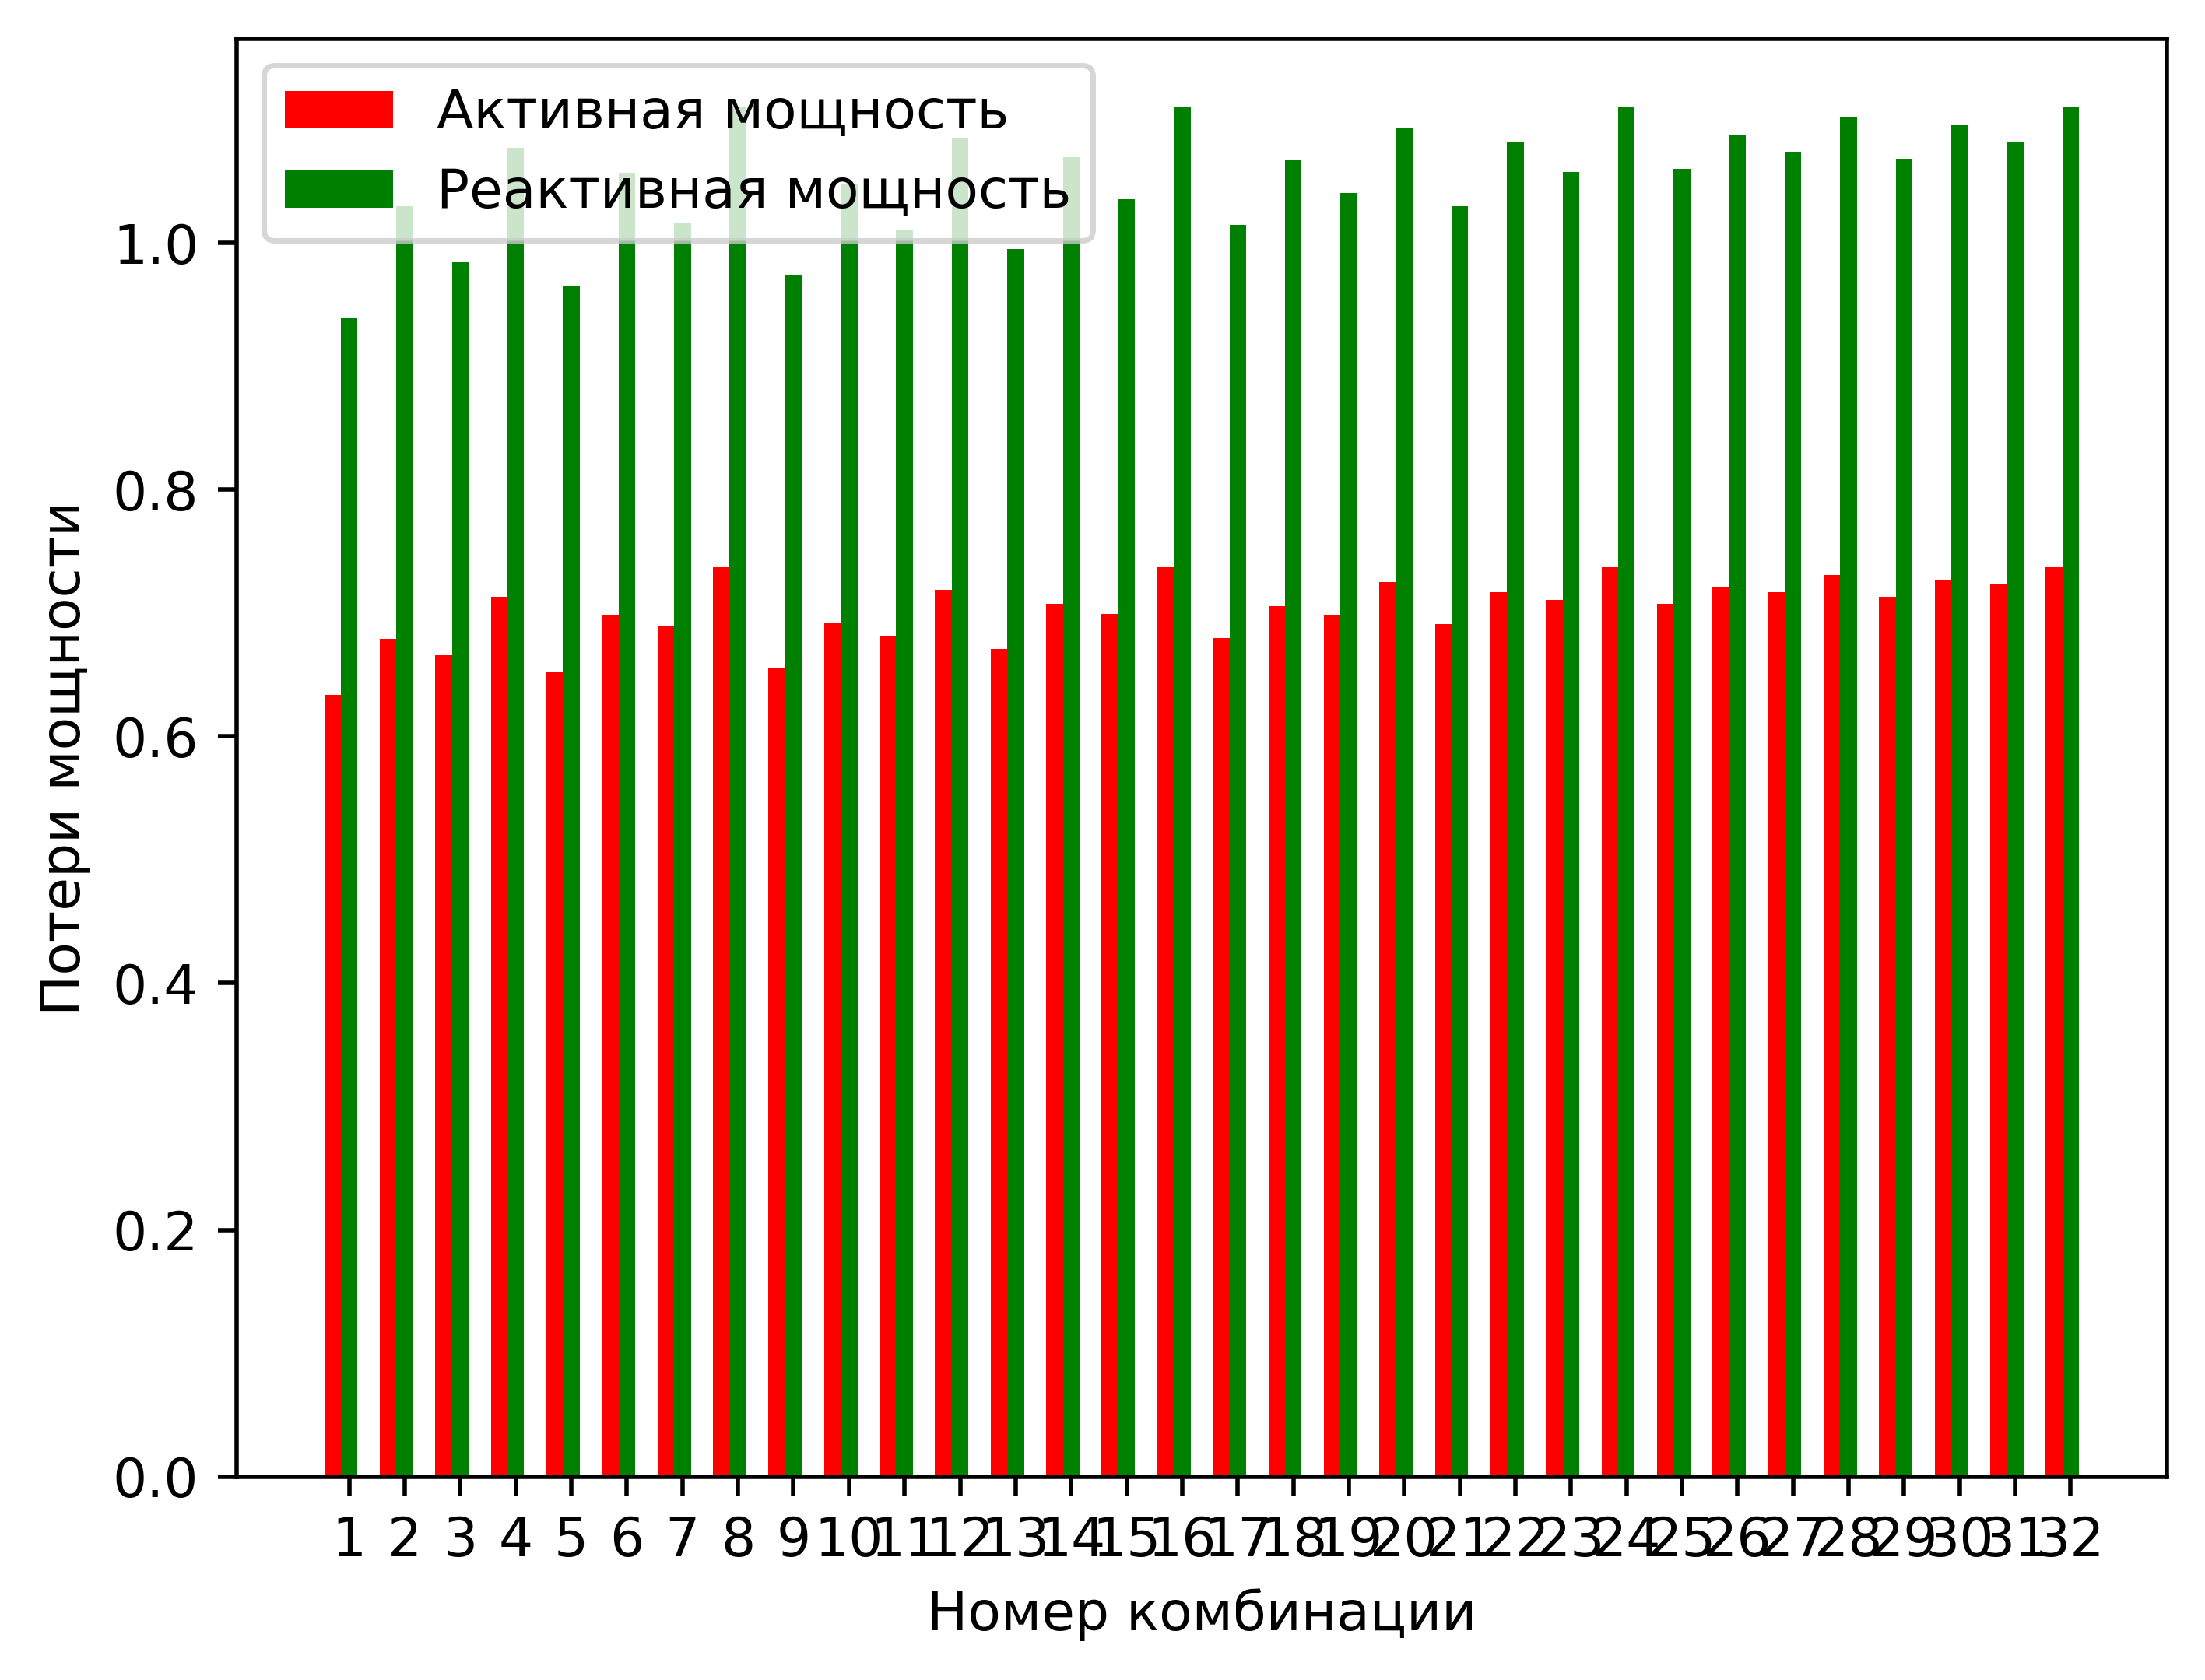

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#При помощи matplotlib построим гистограмму, где по оси абсцисс будет вариант расположения установок КРМ, а по оси ординат потери мощности(активные и реактивные)
var = range(1, 33, 1)
print(var)
N = len(variants)
print(N)
ind = np.arange(N)  # the x locations for the groups
width = 0.3     # the width of the bars

fig = plt.figure(dpi=500)
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, pl_list, width, color='r', label=pl_list)
rects2 = ax.bar(ind+width, ql_list, width, color='g', label=ql_list)


ax.set_ylabel('Потери мощности')
ax.set_xlabel('Номер комбинации')
ax.set_xticks(ind+width)
ax.set_xticklabels(var)
ax.legend( (rects1[0], rects2[0]), ('Активная мощность', 'Реактивная мощность') )

plt.show()

Вывод: В результате проделанной работы, генераторы в узлах электрической сети были заменены на установки компенсации реактивной мощности. Необходимо было проверить значения потерь мощности при различных комбинациях расположения установок, при этом регулируя мощность конденсаторных батарей от 100% до 25%. Используя функции и библиотеку itertools получилось просчитать все возможные комбинации установок КРМ в различных узлах, при этос регулируя их мощность. На основании полученных результатов была построеная гистограмма, которая показывает значение потерь в системе для каждого варианта расположения. Как видно из гистограммы, вариант 1 обладает наименьшими потерями. При данном варианте, установки имеют 100% мощности от своего номинала, при этом они выведены в работу во всех трех узлах. В именнованых единицах этот вариант имеет следующие значения:
dP = 0.63349 кВт, dQ = 0.9386 кВар.
